In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

<h1 align="center"><b><u>Lecture 5 - Markov Chain Monte Carlo (MCMC)</u></b></h1>

<h2>Metropolis-Hastings Alogrithm</h2>

From lecture 5, the Metropolis-Hastings (MH) algorithm was defined, which allows us to form a Markov chain with its invariant distibution being our "target" distribution ($\pi^*(dx)$).  Running the algorithm for long enough, and under the right conditions for convergence, the chain represents samples drawn from the target distribution. 

The MH algorithm takes samples from a proposal distribution ($q(x,y)$, where x is the previous state of the chain, and y the next state), and accepts the new sample with an "Acceptance probability", $\alpha(x,y)$, given by:

$$
\alpha(x,y) = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)}
$$

For this example, we will use a symmetric proposal distribution: 
$$
q(x,y) \sim \mathcal{N} (y; x,\sigma^{2})
$$
meaning that the acceptance probability is just the ratio of the target density at y and x, ($\pi(y)/\pi(x)$).  The target distribution will just be the standard Gaussian - $\pi \sim \mathcal{N}(0,1)$.



Below the statistics for the proposal and target distributions are given.

In [13]:
# Target distribution 
target = norm(0,1)

In [14]:
###--- Parameters ---###

sigma = 2      # Proposal distribution's standard deviation
N = 1000       # Number of samples to be taken
initial = 1    # Initial start point of the Markov chain

The MH algorithm is scripted below - see the last slide of lecture 5 for the pseudo-code from which this has been generated.

In [15]:
def MH(initial, target_dist, proposal_std, n):
    samples = []

    x = initial
    
    for _ in range(n):
        # Sample from proposal, mean is the previous sample
        y = norm.rvs(loc=x,scale=proposal_std)

        # Sample from uniform on [0,1]
        u = uniform.rvs()

        # Calculate acceptance ratio, only target involved because proposal is symmetric
        a = min(target_dist.pdf(y)/target_dist.pdf(x), 1)
        
        # Check if new sample is accepted
        if u <= a:
            samples.append(y)
            x = y
        else:
            samples.append(x)

    return samples

The Markov chain is now generated, with $N=1000$ samples, and the results of the sampling are shown below, through a comparison of the normed histogram of samples to the true target pdf.

In [16]:
samples = MH(initial, target, sigma, N)

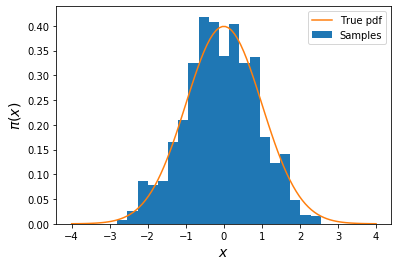

Estimated mean:  -0.07291421663289431     True mean: 0
Estimated variance:  0.9265284722763028     True variance: 1


In [17]:
## Plotting
plt.hist(samples, bins=20, density="probability",label="Samples")
x = np.linspace(-4,4,100)
plt.plot(x,target.pdf(x),label="True pdf")
plt.xlabel(r"$x$",fontsize=14)
plt.ylabel(r"$\pi(x)$", fontsize=14)
plt.legend()
plt.show()

# Mean and variance estimates for the target distribution
est_mean = np.mean(samples)
est_var = np.var(samples)
print("Estimated mean: ", est_mean, "    True mean: 0")
print("Estimated variance: ", est_var, "    True variance: 1")

Now you can adapt the parameters and observe how this affects the quality of the samples.

Try the following separately:<br/>
<ul>
    <li> Reduce N to below 100. </li>
    <li> Reduce the proposal variance ($\sigma = 0.05$), and observe the "poor mixing" of the Markov chain.</li>
    <li>Initialise the chain far from important region of the distribution (i.e. initial=15).  Now read up on "Burn-in" - do you understand why it is necessary based on the samples you observe?</li>
</ul>
